# Automobile Classification via Neural Networks

### Introduction
The development of autonomous vehicles, colloquially referred to as self-driving cars, requires solutions that address a wide array of tasks, for example, traffic sign recognition, motor adjustments according to weather changes, object detection/recognition, etc. The current market offers semi-autonomous vehicles that can be legally purchased and operated, but a truely autonomous car (e.g. one that can equal or outperform a human drive in standard driving procedures) has yet to be developed. Fundamentally, human cognition, which is what artificial intelligence aims to replicate, is not fully understood. To build a truly intelligent, self driving vehicle is to solve a plethora of computer vision and artificial intelligence tasks, which themselves entail smaller sub-tasks. The aim of this project is to develop a machine/deep learning model to perform classification tasks. Specifically, neural networks will developed to classify images of vehicles by car model and make. 

### Baseline Model
As per standard procedure, we start with a baseline model to calculate a metric we want future iterations to surpass. This model loads images that have been transformed so that all inputs have the same dimensions.

In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from random import shuffle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

#### Preparing Training Data

In [16]:
def create_training_data(img_size, gray_bool):
    train_data_list = []
    idx = 0
    train_dir = os.path.join('data', 'cars_train')
    for category in os.listdir(train_dir):
        path = os.path.join(train_dir, category)
        for car_img in os.listdir(path):
            try:
                img_arr = imread(os.path.join(path, car_img), as_gray=gray_bool)
                resized_img = resize(img_arr, (img_size, img_size))
                train_data_list.append((resized_img, idx))
            except Exception as e:
                pass
        idx += 1
    return train_data_list

In [3]:
SIZE = 125
train_data = create_training_data(SIZE, True)
shuffle(train_data)

#### Verifying Data

In [4]:
cat_dir = os.path.join('data', 'cars_train')
categories = os.listdir(cat_dir)
cat_df = pd.DataFrame({'Class': categories})
cat_df.head()

,Class
0,Acura Integra Type R 2001
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


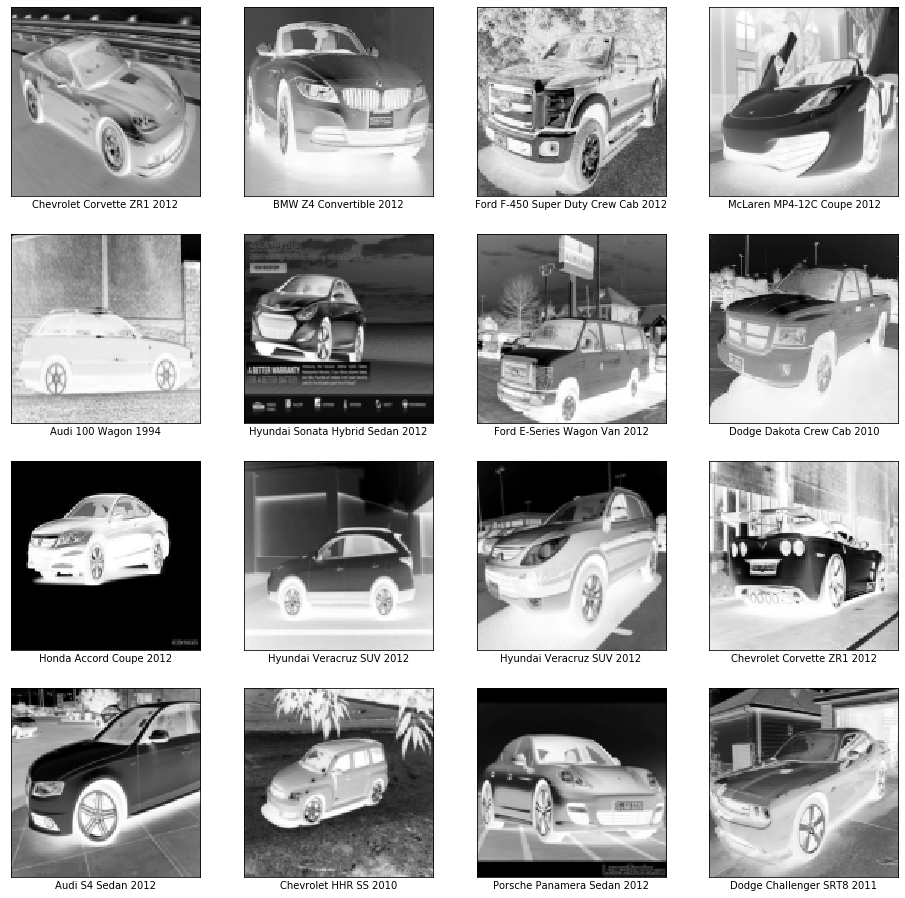

In [5]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i][0], cmap=plt.cm.binary)
    plt.xlabel(cat_df.iloc[train_data[i][1]][0])
plt.show()

In [6]:
X = []
y = []

for image, label in train_data:    
    X.append(image)
    y.append(label)
X = np.array(X).reshape(-1, SIZE, SIZE, 1)

#### Building Convolutional Neural Network

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(196, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.33)

Train on 5456 samples, validate on 2688 samples
Epoch 1/10
5456/5456 [==============================] - 69s 13ms/sample - loss: 5.2759 - acc: 0.0057 - val_loss: 5.2789 - val_acc: 0.0056
Epoch 2/10
5456/5456 [==============================] - 69s 13ms/sample - loss: 5.2418 - acc: 0.0097 - val_loss: 5.2859 - val_acc: 0.0074
Epoch 3/10
5456/5456 [==============================] - 70s 13ms/sample - loss: 5.0859 - acc: 0.0258 - val_loss: 5.3385 - val_acc: 0.0119
Epoch 4/10
5456/5456 [==============================] - 70s 13ms/sample - loss: 4.4485 - acc: 0.0926 - val_loss: 5.5320 - val_acc: 0.0138
Epoch 5/10
5456/5456 [==============================] - 69s 13ms/sample - loss: 3.2246 - acc: 0.2793 - val_loss: 7.0430 - val_acc: 0.0123
Epoch 6/10
5456/5456 [==============================] - 69s 13ms/sample - loss: 1.8043 - acc: 0.5563 - val_loss: 8.8251 - val_acc: 0.0108
Epoch 7/10
5456/5456 [==============================] - 72s 13ms/sample - loss: 0.7357 - acc: 0.8081 - val_loss: 13.2637 - v

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


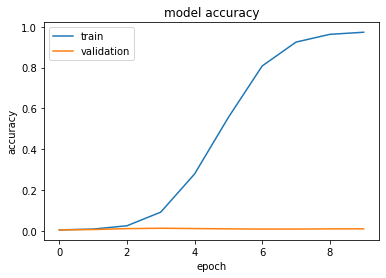

In [13]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

The baseline model shows that while training accuracy increases with each iteration (epoch), the validation loss increases. This is a sign of overfitting; the model is unable to accurately predict labels for data it has not seen. 

#### Improved Model (Revision 1)

In [18]:
train_data_rev1 = create_training_data(SIZE, False)
shuffle(train_data_rev1)

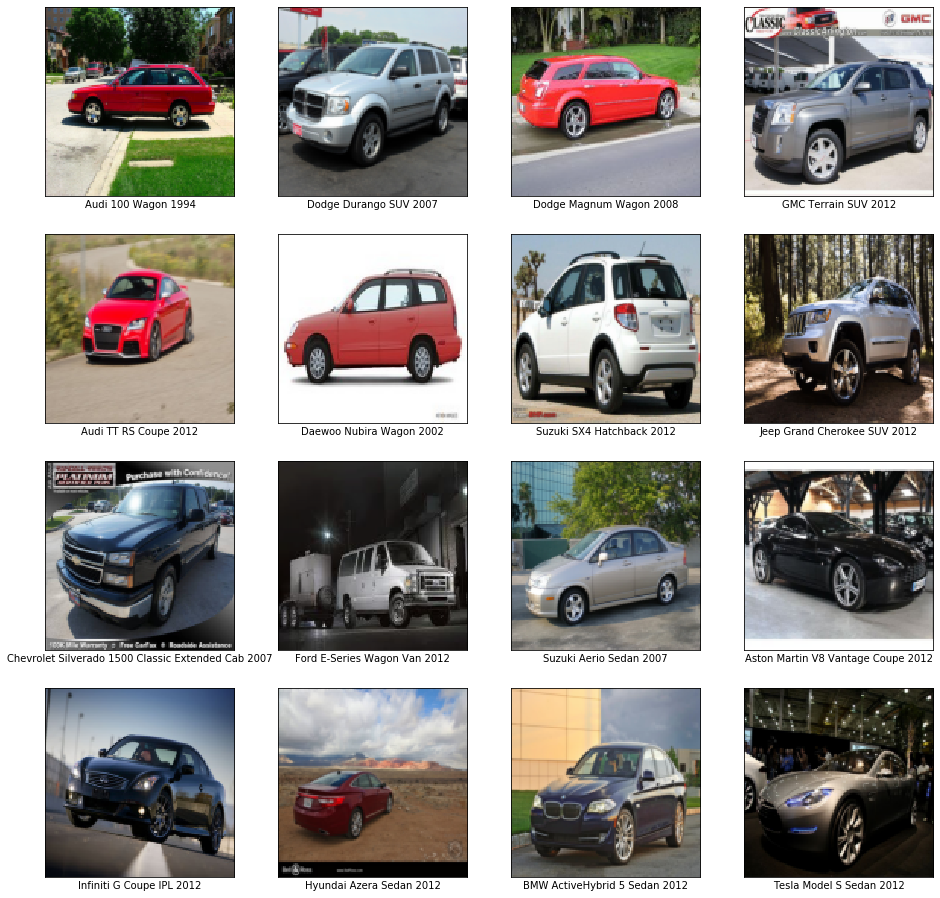

In [31]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_rev1[i][0], cmap=plt.cm.binary)
    plt.xlabel(cat_df.iloc[train_data_rev1[i][1]][0])
plt.show()

In [68]:
X_rev1 = []
y_rev1 = []

for i in train_data_rev1:
    if i[0].shape == (125, 125, 3):
        X_rev1.append(i[0])
        y_rev1.append(i[1])

X_rev1 = np.array(X_rev1).reshape(-1, SIZE, SIZE, 3)

In [69]:
model_rev1 = models.Sequential()
model_rev1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(125, 125, 3)))
model_rev1.add(layers.MaxPooling2D((2, 2)))
model_rev1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_rev1.add(layers.MaxPooling2D((2, 2)))
model_rev1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_rev1.add(layers.Flatten())
model_rev1.add(layers.Dense(64, activation='relu'))
model_rev1.add(layers.Dense(196, activation='softmax'))

In [70]:
model_rev1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_rev1.fit(X_rev1, y_rev1, batch_size=32, epochs=10, validation_split=0.33)

Train on 5444 samples, validate on 2682 samples
Epoch 1/10
5444/5444 [==============================] - 90s 17ms/sample - loss: 5.2531 - acc: 0.0073 - val_loss: 5.2213 - val_acc: 0.0116
Epoch 2/10
5444/5444 [==============================] - 98s 18ms/sample - loss: 5.1689 - acc: 0.0121 - val_loss: 5.2060 - val_acc: 0.0097
Epoch 3/10
5444/5444 [==============================] - 88s 16ms/sample - loss: 5.0856 - acc: 0.0176 - val_loss: 5.2003 - val_acc: 0.0130
Epoch 4/10
5444/5444 [==============================] - 87s 16ms/sample - loss: 4.9065 - acc: 0.0338 - val_loss: 5.2148 - val_acc: 0.0183
Epoch 5/10
5444/5444 [==============================] - 87s 16ms/sample - loss: 4.3647 - acc: 0.1016 - val_loss: 5.5431 - val_acc: 0.0194
Epoch 6/10
5444/5444 [==============================] - 87s 16ms/sample - loss: 3.0144 - acc: 0.3163 - val_loss: 6.5619 - val_acc: 0.0198
Epoch 7/10
5444/5444 [==============================] - 87s 16ms/sample - loss: 1.4252 - acc: 0.6508 - val_loss: 9.6271 - va

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


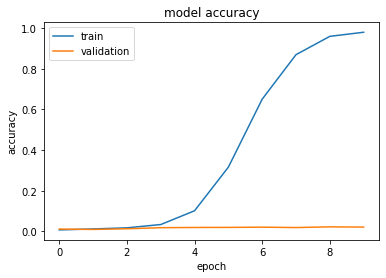

In [71]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# SCRATCH WORK

In [ ]:
train_data_list = []
os.listdir(path)
for car_img in os.listdir(path):
    try:
        img_arr = imread(os.path.join(path, car_img))
        resized_img = resize(img_arr, (img_arr.shape[0]//4, img_arr.shape[1]//4))
        train_data_list.append((resized_img, 0))
    except Exception as e:
        pass


print(sys.getsizeof(train_data_list[0][0]))
io.imshow(train_data_list[2][0])
plt.show()

### Model Fairness Evaluation
Fairness evaluation, or parity measure, tells us the performance of the model between different subsets of the data. Specifically, we want to investigate if the model performs better on certain groups, for example Hondas vs. Toyotas, or red cars vs. blue cars.

### References

**3D Object Representations for Fine-Grained Categorization** <br>
Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei <br>
*4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013* **(3dRR-13)**. Sydney, Australia. Dec. 8, 2013.
https://ai.stanford.edu/~jkrause/papers/3drr13.pdf